Дипломная работа по курсу «Python для анализа данных»

1.Загрузить файл hr.csv.  
2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).  
3.Рассчитать и визуализировать корреляционную матрицу для переменных.  
4.Визуализировать несколько взаимосвязей между переменными.  
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.  
6.Рассчитать сколько работников работает в каждом департаменте.  
7.Показать распределение сотрудников по зарплатам.  
8.Показать распределение сотрудников по зарплатам совместно с департаментами.  
9.Сколько сотрудников покинули компанию.  
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.  
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете.  

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import seaborn as sns
import researchpy as rp
import matplotlib.pyplot as plt
%matplotlib inline

### 1.Загрузить файл hr.csv.

In [2]:
data=pd.read_csv('hr.csv',sep=",")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


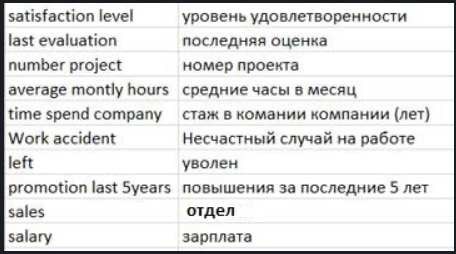

In [3]:
Image('Описание.png')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
 data.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

### 2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [6]:
# Среднее
data.describe().loc['mean':'mean',:]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.14461,0.238083,0.021268


In [7]:
# Медиана
pd.DataFrame(data.median()).T.rename(index={0: 'median'})

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
median,0.64,0.72,4.0,200.0,3.0,0.0,0.0,0.0


In [8]:
# Мода (в поле average_montly_hours есть 2 числа, которые встречаются одинаково часто 135 и 156)
data.mode().rename(index={0: 'mode1', 1: 'mode2'})

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
mode1,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
mode2,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Минимум и максимум
data.describe().loc[['min','max'],:]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
min,0.09,0.36,2.0,96.0,2.0,0.0,0.0,0.0
max,1.00,1.00,7.0,310.0,10.0,1.0,1.0,1.0


In [10]:
# Стандартное отклонение
data.describe().loc['std':'std',:]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281


### 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [11]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1,0.11,-0.14,-0.02,-0.1,0.059,-0.39,0.026
last_evaluation,0.11,1,0.35,0.34,0.13,-0.0071,0.0066,-0.0087
number_project,-0.14,0.35,1,0.42,0.2,-0.0047,0.024,-0.0061
average_montly_hours,-0.02,0.34,0.42,1,0.13,-0.01,0.071,-0.0035
time_spend_company,-0.1,0.13,0.2,0.13,1,0.0021,0.14,0.067
Work_accident,0.059,-0.0071,-0.0047,-0.01,0.0021,1,-0.15,0.039
left,-0.39,0.0066,0.024,0.071,0.14,-0.15,1,-0.062
promotion_last_5years,0.026,-0.0087,-0.0061,-0.0035,0.067,0.039,-0.062,1


### 4.Визуализировать несколько взаимосвязей между переменными.

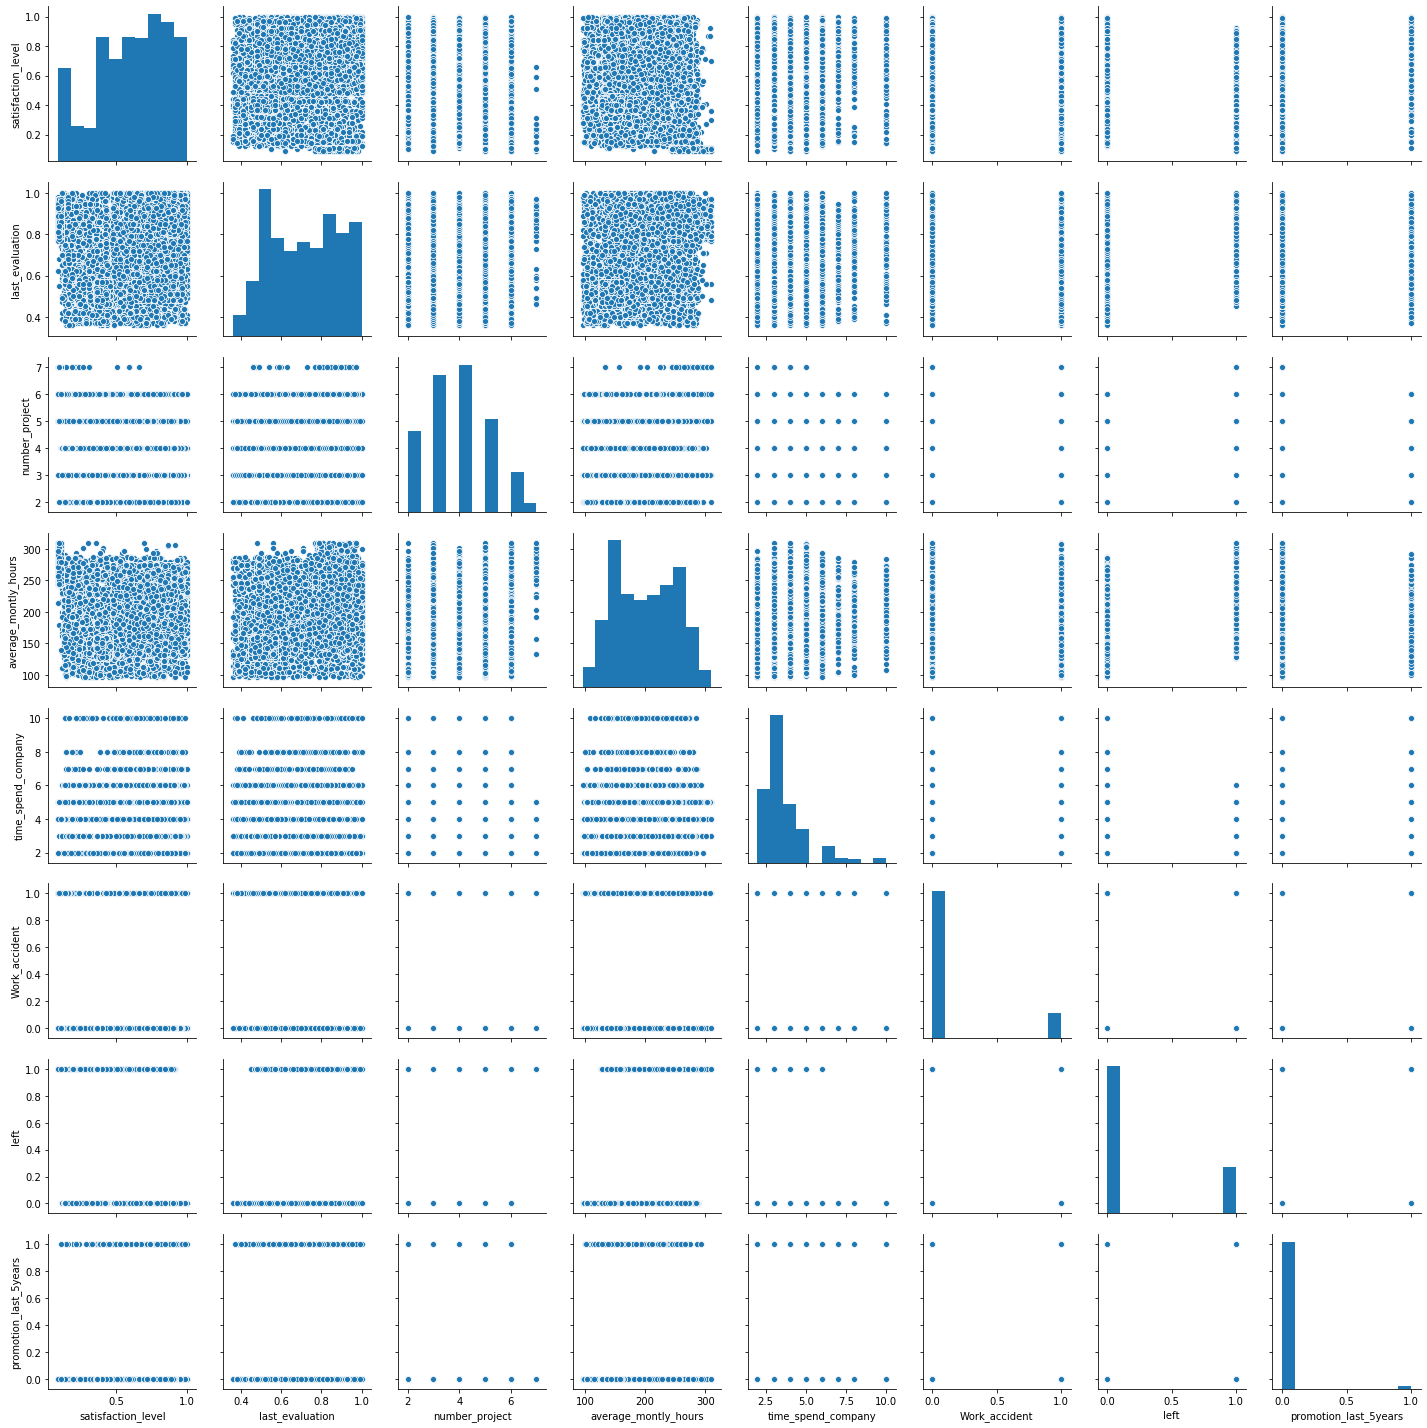

In [12]:
sns.pairplot(data)

In [13]:
# С помощью графика pairplot трудно увидеть закономерность 

In [14]:
# Посмотрю зависимость уровня удовлетворенности от стажа работы в компании.

In [15]:
# В датасете указаны следующие значения стажа
time_spend = sorted(list(data.time_spend_company.unique()))
time_spend

[2, 3, 4, 5, 6, 7, 8, 10]

In [16]:
# Создаю новый DataFrame, где наименование столбцов это стаж работы, 
# а в самих столбцах содержатся данные по уровню удовлетворенности
data_all = pd.DataFrame()
for i in time_spend:
    data_i = data[['satisfaction_level']][data['time_spend_company'] == i]
    data_i.columns = [i]
    data_all = pd.concat([data_all,data_i], axis=1)

In [17]:
data_all.head()

,2,3,4,5,6,7,8,10
0,NaN,0.38,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.8,NaN,NaN,NaN
2,NaN,NaN,0.11,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.72,NaN,NaN,NaN,NaN
4,NaN,0.37,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'satisfaction_level')

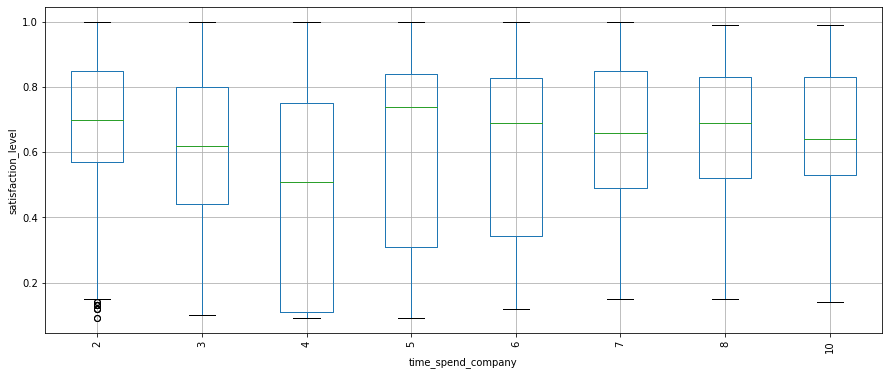

In [18]:
# Построим график boxplot, где по оси X указан стаж работы, а по оси Y  уровень удовлетворенности
boxplot_ = data_all.boxplot(figsize=(15,6), rot=90)
plt.xlabel('time_spend_company')
plt.ylabel('satisfaction_level')

In [19]:
# Уровень удовлетворенности не имеет однозначной тенденции в зависимости от стажа работы. 
# Медиана уровня удовлетворенности проходит путь по синусоиде. 
# Медиана достигает максимума при стаже 5 лет, а минимум 4 года

In [24]:
# Посмотрю зависимость уровня удовлетворенности от уровня ЗП сотрудника.

In [25]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [26]:
salary_level = list(data.salary.unique())
salary_level

['low', 'medium', 'high']

In [27]:
data_salary = pd.DataFrame()
for i in salary_level:
    data_i = data[['satisfaction_level']][data['salary'] == i]
    data_i.columns = [i]
    data_salary = pd.concat([data_salary,data_i], axis=1)

In [28]:
data_salary.head()

,low,medium,high
0,0.38,NaN,NaN
1,NaN,0.80,NaN
2,NaN,0.11,NaN
3,0.72,NaN,NaN
4,0.37,NaN,NaN


Text(0, 0.5, 'satisfaction_level')

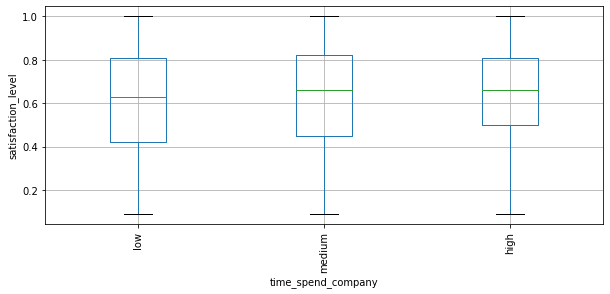

In [29]:
# Построим график boxplot, где по оси X указан стаж работы, а по оси Y  уровень удовлетворенности
boxplot_salary = data_salary.boxplot(figsize=(10,4), rot=90)
plt.xlabel('time_spend_company')
plt.ylabel('satisfaction_level')

In [30]:
# Уровень удовлетворенности сотрудников с ЗП medium и high выше, чем low

### 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.  

In [31]:
# Проверю взаимосвязь между уровнем удовлетворенности и средним количеством рабочих часов в месяц.
descriptives, results = rp.ttest(data.satisfaction_level, data.average_montly_hours)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,satisfaction_level,14999.0,0.612834,0.248631,0.002030,0.608854,0.616813
1,average_montly_hours,14999.0,201.050337,49.943099,0.407797,200.251004,201.849669
2,combined,29998.0,100.831585,106.260430,0.613515,99.629069,102.034102


In [32]:
results

,Independent t-test,results
0,Difference (satisfaction_level - average_montl...,-200.4375
1,Degrees of freedom =,29996.0000
2,t =,-491.5065
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-5.6756
7,Hedge's g =,-5.6755
8,Glass's delta =,-806.1657
9,r =,0.9432


In [33]:
# p-value < 0.05, поэтому можно сказать что имеется статистическое различие между атрибутами.
# Т.е. уровень удовлетворенности не зависит от среднее количества рабочих часов в месяц.

### 6.Рассчитать сколько работников работает в каждом департаменте. 

In [35]:
employees = data[data['left'] == 0].sales.value_counts()
pd.DataFrame({'departament':employees.index, 'number of employees':employees.values})

,departament,number of employees
0,sales,3126
1,technical,2023
2,support,1674
3,IT,954
4,product_mng,704
5,RandD,666
6,marketing,655
7,accounting,563
8,management,539
9,hr,524


 ### 7.Показать распределение сотрудников по зарплатам.  

In [36]:
# Распределение действующих сотрудников по зарплатам
employees_salary = data[data['left'] == 0].salary.value_counts()
employees_salary = pd.DataFrame({'number of employees':employees_salary.values}, index=employees_salary.index)
employees_salary

,number of employees
low,5144
medium,5129
high,1155


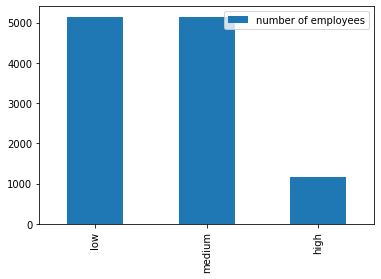

In [37]:
employees_salary.plot(kind='bar')

### 8.Показать распределение сотрудников по зарплатам совместно с департаментами.  

In [38]:
# Распределение действующих сотрудников по зарплатам и департаментам
employees_salary_dep = data[data['left'] == 0].groupby(['sales','salary']).count()[['satisfaction_level']]
employees_salary_dep.columns = ['number of employees']
employees_salary_dep

number of employees
sales       salary                     
IT          high                     79
            low                     437
            medium                  438
RandD       high                     47
            low                     309
            medium                  310
accounting  high                     69
            low                     259
            medium                  235
hr          high                     39
            low                     243
            medium                  242
management  high                    224
            low                     121
            medium                  194
marketing   high                     71
            low                     276
            medium                  308
product_mng high                     62
            low                     346
            medium                  296
sales       high                    255
            low                    1402
            medium                 1469
support     high                    133
            low                     757
            medium                  784
technical   high                    176
            low                     994
            medium                  853

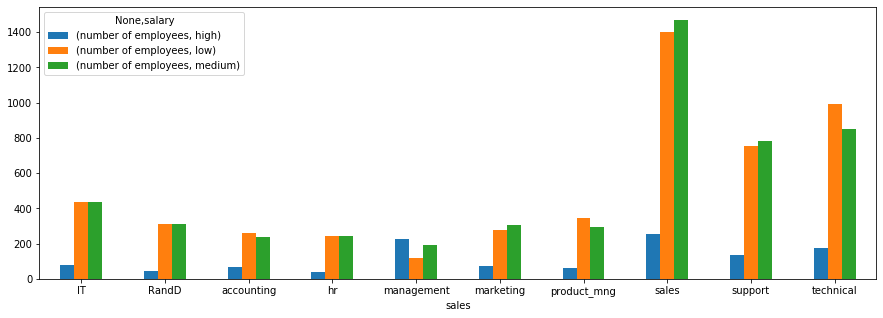

In [39]:
employees_salary_dep.unstack().plot(kind='bar', figsize=(15,5), rot=0)

### 9.Сколько сотрудников покинули компанию.  

In [40]:
print(f"Покинуло компанию {data[data['left'] == 1]['satisfaction_level'].count()} сотрудников")

Покинуло компанию 3571 сотрудников


### 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию. 

In [41]:
# Проверим гипотезу о том, что сотрудники покидают компанию из-за несчастного случая на работе.

In [42]:
current = data[data['left']==0].promotion_last_5years
non_current = data[data['left']==1].promotion_last_5years

In [43]:
descriptives, results = rp.ttest(current, non_current)

print(descriptives)
print('_______________________________________')
print(results)

                Variable        N      Mean        SD        SE  95% Conf.  \
0  promotion_last_5years  11428.0  0.026251  0.159889  0.001496   0.023320   
1  promotion_last_5years   3571.0  0.005321  0.072759  0.001218   0.002933   
2               combined  14999.0  0.021268  0.144281  0.001178   0.018959   

   Interval  
0  0.029183  
1  0.007708  
2  0.023577  
_______________________________________
                                  Independent t-test     results
0  Difference (promotion_last_5years - promotion_...      0.0209
1                              Degrees of freedom =   14997.0000
2                                               t =       7.5812
3                           Two side test p value =       0.0000
4                          Difference < 0 p value =       1.0000
5                          Difference > 0 p value =       0.0000
6                                       Cohen's d =       0.1453
7                                       Hedge's g =       0.1453
8     

In [44]:
# Можно заметить, что есть разница между действующими сотрудниками и теми, кто покинул компанию (pvalue<0.05). 
# Но получается прямо противоположный вывод: 
# те, у кого был несчастный случай на работе реже покидают компанию, чем, те у которых его не было.

In [45]:
# Проверим гипотезу о том, что сотрудники покидают компанию из-за более низкого уровня ЗП.

In [46]:
# Для этого оцифруем уровен ЗП
def salary_level(salary):
    if salary == 'low':
        return 1
    elif salary == 'medium':
        return 2
    elif salary == 'high':
        return 3

data['salary_level'] = data['salary'].apply(salary_level)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [47]:
current = data[data['left']==0].salary_level
non_current = data[data['left']==1].salary_level

In [48]:
descriptives, results = rp.ttest(current, non_current)

print(descriptives)
print('_______________________________________')
print(results)

       Variable        N      Mean        SD        SE  95% Conf.  Interval
0  salary_level  11428.0  1.650945  0.655277  0.006130   1.638930  1.662960
1  salary_level   3571.0  1.414730  0.537341  0.008992   1.397100  1.432360
2      combined  14999.0  1.594706  0.637183  0.005203   1.584508  1.604904
_______________________________________
                            Independent t-test     results
0  Difference (salary_level - salary_level) =       0.2362
1                        Degrees of freedom =   14997.0000
2                                         t =      19.5822
3                     Two side test p value =       0.0000
4                    Difference < 0 p value =       1.0000
5                    Difference > 0 p value =       0.0000
6                                 Cohen's d =       0.3754
7                                 Hedge's g =       0.3754
8                             Glass's delta =       0.3605
9                                         r =       0.1579


In [49]:
# Можно заметить, что есть разница между действующими сотрудниками и теми, кто покинул компанию (pvalue<0.05). 
# Действительно, работу покидают сотрудники с более низким уровнем ЗП.
# Можно также увидеть соотношения в данном своде:
data.groupby(['left', 'salary_level', 'salary']).count()[['sales']]

sales
left salary_level salary       
0    1            low      5144
     2            medium   5129
     3            high     1155
1    1            low      2172
     2            medium   1317
     3            high       82

In [51]:
# Проверим гипотезу о том, что сотрудники покидают компанию из-за низкого уровня удовлетворенности
current = data[data['left']==0].satisfaction_level
non_current = data[data['left']==1].satisfaction_level

In [52]:
descriptives, results = rp.ttest(current, non_current)

print(descriptives)
print('_______________________________________')
print(results)

             Variable        N      Mean        SD        SE  95% Conf.  \
0  satisfaction_level  11428.0  0.666810  0.217104  0.002031   0.662829   
1  satisfaction_level   3571.0  0.440098  0.263933  0.004417   0.431438   
2            combined  14999.0  0.612834  0.248631  0.002030   0.608854   

   Interval  
0  0.670790  
1  0.448758  
2  0.616813  
_______________________________________
                                  Independent t-test     results
0  Difference (satisfaction_level - satisfaction_...      0.2267
1                              Degrees of freedom =   14997.0000
2                                               t =      51.6128
3                           Two side test p value =       0.0000
4                          Difference < 0 p value =       1.0000
5                          Difference > 0 p value =       0.0000
6                                       Cohen's d =       0.9895
7                                       Hedge's g =       0.9894
8                 

In [54]:
# Можно заметить, что есть разница между действующими сотрудниками и теми, кто покинул компанию (pvalue<0.05). 
# Действительно, работу покидают сотрудники с более низким уровнем удовлетворенности

### 11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете. 

In [ ]:
# Сделано